In [194]:
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

In [195]:
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [196]:
import sys

sys.path.append("..")

<IPython.core.display.Javascript object>

In [224]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Union
from scipy.stats import poisson
from util.plotting import plot_volt_trace_with_sra

<IPython.core.display.Javascript object>

In [20]:
plt.rcParams["figure.figsize"] = (16, 8)

<IPython.core.display.Javascript object>

In [239]:
class LIF_SRA:
    def __init__(self, dt: float):

        self.dt = dt

        self.E_l = -65.0  # resting potential
        self.v_th = -50.0  # threshold
        self.v_reset = -65.0  # v_reset
        self.tau_m = 30.0  # membrane time constant -> given by TODO
        self.R = 90  # resistance

        self.spikes = []
        self.voltages = [self.E_l]

        self.E_k = -70
        self.g_delta = 0.1 / self.tau_m
        self.tau_g = 100.0
        self.sra = [0]

    def step(self, input_current: Union[float, int]):
        if self.voltages[-1] >= self.v_th:
            self.spikes = self.spikes + [len(self.voltages)]
            v = self.v_reset

            d_sra = self.sra[-1] + (self.g_delta / self.tau_m)

        else:
            dv = (
                (self.dt / self.tau_m) * (self.E_l - self.voltages[-1])
                - (self.tau_m * self.sra[-1] * (self.voltages[-1] - self.E_k))
                + (input_current / self.R)
            )

            d_sra = -self.sra[-1] * (self.dt / self.tau_g)

            v = self.voltages[-1] + dv

        self.sra += [self.sra[-1] + d_sra]
        self.voltages += [v]

<IPython.core.display.Javascript object>

In [240]:
mu = 0.1
dt = 0.1
size = 5000
np.random.seed(seed=1)
ips = poisson.rvs(0.2, size=size - 1)
ips[ips > 0] = 1
ips *= 3

<IPython.core.display.Javascript object>

In [241]:
ips = np.zeros(size - 1)
ips[500:5000] = 40

<IPython.core.display.Javascript object>

In [242]:
lif.spikes

[537, 577, 622, 685, 1036, 1781, 2526, 3272, 4017, 4762]

<IPython.core.display.Javascript object>

no of spikes: 9


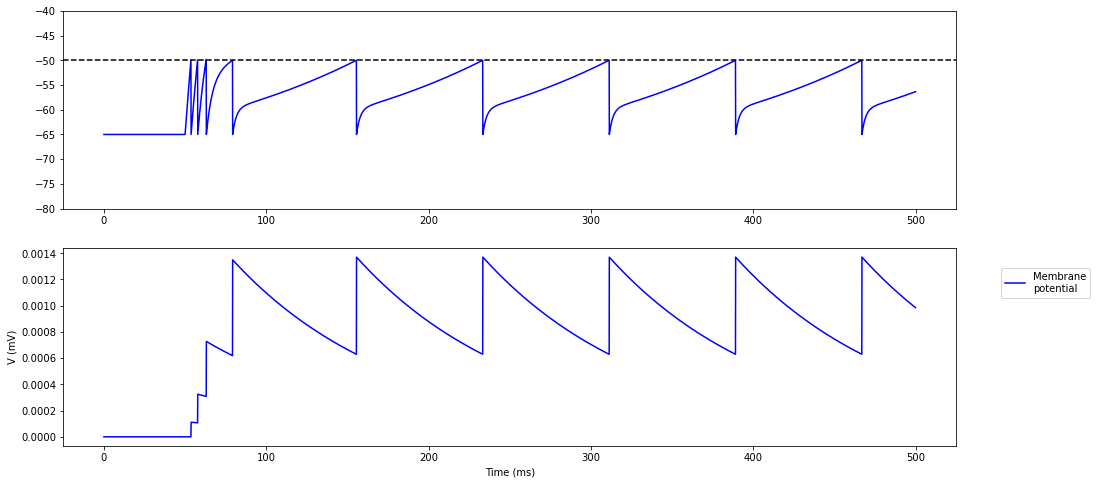

<IPython.core.display.Javascript object>

In [243]:
lif = LIF_SRA(dt=dt)

for inp in ips:
    lif.step(inp)

plot_volt_trace_with_sra(lif.voltages, lif.v_th, dt=dt, sim_length=size, sra=lif.sra)
print(f"no of spikes: {len(lif.spikes)}")